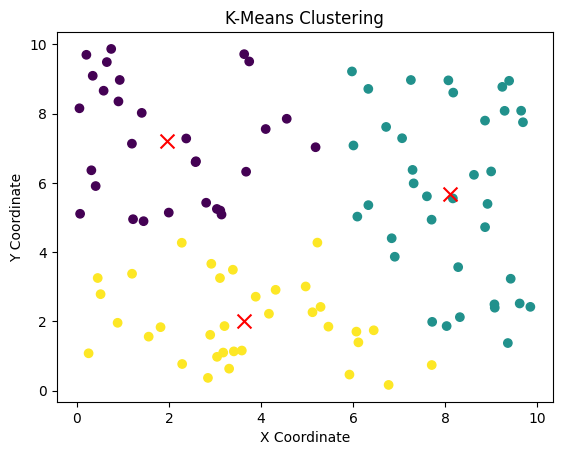

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, num_clusters=3, max_steps=100):
        self.num_clusters = num_clusters
        self.max_steps = max_steps
        self.centers = None
        self.labels = None

    def fit(self, data):
        self.centers = data[:self.num_clusters]
        for _ in range(self.max_steps):
            labels = []
            for point in data:
                distances = []
                for center in self.centers:
                    distance = np.sqrt(sum((point - center) ** 2))
                    distances.append(distance)
                closest_cluster = np.argmin(distances)
                labels.append(closest_cluster)
            self.labels = np.array(labels)
            new_centers = []
            for i in range(self.num_clusters):
                points_in_cluster = data[self.labels == i]
                if len(points_in_cluster) > 0:
                    new_center = points_in_cluster.mean(axis=0)
                else:
                    new_center = self.centers[i]
                new_centers.append(new_center)
            new_centers = np.array(new_centers)
            if np.all(new_centers == self.centers):
                break
            self.centers = new_centers

np.random.seed(42)
num_points = 100
data = np.random.rand(num_points, 2) * 10

kmeans = KMeans(num_clusters=3)
kmeans.fit(data)

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], color='red', marker='x', s=100, label='Centers')
plt.title("K-Means Clustering")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()